In [24]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import keras
from keras.models import *
import matplotlib.pyplot as plt
import os
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import keras
from keras.models import load_model
from keras.models import Sequential
import cv2
import numpy as np

In [2]:
#CNN
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [3]:
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [4]:
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [5]:
# dense 
model.add(Flatten()) # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',
optimizer='rmsprop',
metrics=['accuracy'])

In [6]:

datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
rescale=1./255,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

In [7]:
datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')


In [8]:
img = load_img('data/train/cats/cat453a.jpg') # this is a PIL image
x = img_to_array(img) # this is a Numpy array with shape (3, 150, 150)
print(x.shape)
x = x.reshape((1,) + x.shape) # this is a Numpy array with shape (1, 3, 150, 150)
print(x.shape)
# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1, save_to_dir='data/preview', save_prefix='cat', save_format='jpeg'):
  i += 1
  if i > 20:
    break # otherwise the generator would loop indefinitely

(242, 242, 3)
(1, 242, 242, 3)


In [9]:
model.compile(loss='binary_crossentropy',
optimizer='rmsprop',
metrics=['accuracy'])

In [10]:
batch_size = 16
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
rescale=1./255,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True)

In [11]:
# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
'data/train', # this is the target directory
classes = ["cats","dogs"],
target_size=(150, 150), # all images will be resized to 150x150
batch_size=batch_size,
class_mode='binary') # since we use binary_crossentropy loss, we need binary labels

Found 198 images belonging to 2 classes.


In [13]:
# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
'data/validation',
classes = ["cats","dogs"],
target_size=(150, 150),
batch_size=batch_size,
class_mode='binary')

Found 123 images belonging to 2 classes.


In [14]:
validation_generator.class_indices

{'cats': 0, 'dogs': 1}

In [15]:
history = model.fit_generator(
train_generator,
#steps_per_epoch= 2 , # // batch_size,
epochs=25,
validation_data=validation_generator,
#validation_steps= 2 
) # // batch_size)
model.save('first_model.h5') # always save your weights after training or during training

/opt/anaconda3/envs/machinelearning/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
13/13 [==============================] - 7s 418ms/step - loss: 0.7629 - accuracy: 0.5878 - val_loss: 0.6661 - val_accuracy: 0.5203
Epoch 2/25
13/13 [==============================] - 5s 341ms/step - loss: 0.7598 - accuracy: 0.6215 - val_loss: 0.6011 - val_accuracy: 0.6992
Epoch 3/25
13/13 [==============================] - 5s 369ms/step - loss: 0.5790 - accuracy: 0.6956 - val_loss: 0.6288 - val_accuracy: 0.6341
Epoch 4/25
13/13 [==============================] - 5s 371ms/step - loss: 0.5222 - accuracy: 0.7219 - val_loss: 0.6495 - val_accuracy: 0.7073
Epoch 5/25
13/13 [==============================] - 5s 385ms/step - loss: 0.7392 - accuracy: 0.7311 - val_loss: 0.5413 - val_accuracy: 0.7073
Epoch 6/25
13/13 [==============================] - 5s 383ms/step - loss: 0.4415 - accuracy: 0.8011 - val_loss: 0.5325 - val_accuracy: 0.7236
Epoch 7/25
13/13 [==============================] - 5s 405ms/step - loss: 0.4125 - accuracy: 0.8326 - val_loss: 0.5880 - val_accuracy: 0.6992
Epoch 

In [16]:

model = load_model('first_model.h5')

In [17]:
loss, accuracy = model.evaluate(train_generator, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(validation_generator, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9798
Testing Accuracy:  0.8455


In [18]:

plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()


In [19]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


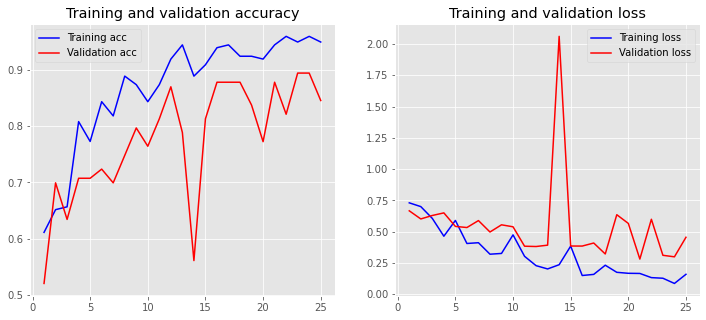

In [20]:
plot_history(history)

In [21]:

#model = Sequential()

#model =load_model('first_try.h5')
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

img = cv2.imread('Image/DogHead/dog000001c.jpg')
img = cv2.resize(img,(150,150))
img2 = np.reshape(img,[1,150,150,3])
classes = model.predict_classes(img2)
print(classes)
plt.imshow(img)

error: OpenCV(4.5.1) /private/var/folders/nz/vv4_9tw56nv9k3tkvyszvwg80000gn/T/pip-req-build-39p1qqfs/opencv/modules/imgproc/src/resize.cpp:4051: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


/opt/anaconda3/envs/machinelearning/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[[0]]


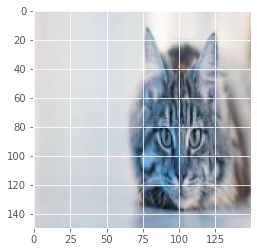

In [27]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

img = cv2.imread('data/test/cat.jpeg')
img = cv2.resize(img,(150,150))
img2 = np.reshape(img,[1,150,150,3])
classes = model.predict_classes(img2)
print(classes)
plt.imshow(img)

[[0]]


/opt/anaconda3/envs/machinelearning/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


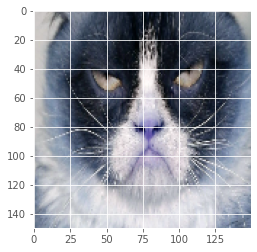

In [28]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

img = cv2.imread('data/test/cat1.jpeg')
img = cv2.resize(img,(150,150))
img2 = np.reshape(img,[1,150,150,3])
classes = model.predict_classes(img2)
print(classes)
plt.imshow(img)

[[1]]


/opt/anaconda3/envs/machinelearning/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


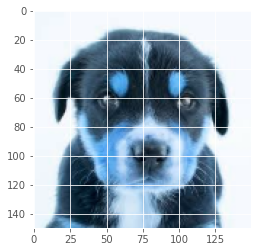

In [29]:

#model = Sequential()

#model =load_model('first_try.h5')
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

img = cv2.imread('data/test/dog.jpeg')
img = cv2.resize(img,(150,150))
img2 = np.reshape(img,[1,150,150,3])
classes = model.predict_classes(img2)
print(classes)
plt.imshow(img)


### multiple classes

In [30]:
#CNN
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [31]:
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [32]:
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [50]:
# dense 
model.add(Flatten()) # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(4))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',
optimizer='rmsprop',
metrics=['accuracy'])

In [51]:

datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
rescale=1./255,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

In [52]:
datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [53]:
img = load_img('data/train/cats/cat453a.jpg') # this is a PIL image
x = img_to_array(img) # this is a Numpy array with shape (3, 150, 150)
print(x.shape)
x = x.reshape((1,) + x.shape) # this is a Numpy array with shape (1, 3, 150, 150)
print(x.shape)
# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1, save_to_dir='data/preview', save_prefix='cat', save_format='jpeg'):
  i += 1
  if i > 20:
    break # otherwise the generator would loop indefinitely

(242, 242, 3)
(1, 242, 242, 3)


In [54]:
model.compile(loss='categorical_crossentropy',
optimizer='rmsprop',
metrics=['accuracy'])

In [55]:
batch_size = 16
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
rescale=1./255,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True)

In [56]:
# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

In [57]:
# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
'data/train', # this is the target directory
classes = ["cats","dogs", "rabbits", "eagles"],
target_size=(150, 150), # all images will be resized to 150x150
batch_size=batch_size,
class_mode='categorical') 

Found 397 images belonging to 4 classes.


In [58]:
# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
'data/validation',
classes = ["cats","dogs", "rabbits","eagles"],
target_size=(150, 150),
batch_size=batch_size,
class_mode='categorical')

Found 159 images belonging to 4 classes.


In [59]:
validation_generator.class_indices

{'cats': 0, 'dogs': 1, 'rabbits': 2, 'eagles': 3}

In [60]:
history = model.fit_generator(
train_generator,
#steps_per_epoch= 2 , # // batch_size,
epochs=25,
validation_data=validation_generator,
#validation_steps= 2 
) # // batch_size)
model.save('second_model.h5') # always save your weights after training or during training

Epoch 1/25
25/25 [==============================] - 9s 326ms/step - loss: 1.3860 - accuracy: 0.2751 - val_loss: 1.3874 - val_accuracy: 0.3899
Epoch 2/25
25/25 [==============================] - 8s 335ms/step - loss: 1.3902 - accuracy: 0.2411 - val_loss: 1.3865 - val_accuracy: 0.3899
Epoch 3/25
25/25 [==============================] - 9s 358ms/step - loss: 1.4002 - accuracy: 0.1831 - val_loss: 1.3867 - val_accuracy: 0.3899
Epoch 4/25
25/25 [==============================] - 10s 388ms/step - loss: 1.3864 - accuracy: 0.2581 - val_loss: 1.3869 - val_accuracy: 0.3899
Epoch 5/25
25/25 [==============================] - 10s 385ms/step - loss: 1.3925 - accuracy: 0.1783 - val_loss: 1.3864 - val_accuracy: 0.0818
Epoch 6/25
25/25 [==============================] - 10s 392ms/step - loss: 1.3865 - accuracy: 0.2680 - val_loss: 1.3864 - val_accuracy: 0.0818
Epoch 7/25
25/25 [==============================] - 10s 394ms/step - loss: 1.3875 - accuracy: 0.2594 - val_loss: 1.3876 - val_accuracy: 0.0818
Ep

In [61]:
loss, accuracy = model.evaluate(train_generator, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(validation_generator, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.2494
Testing Accuracy:  0.3899


In [62]:

plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()


In [63]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


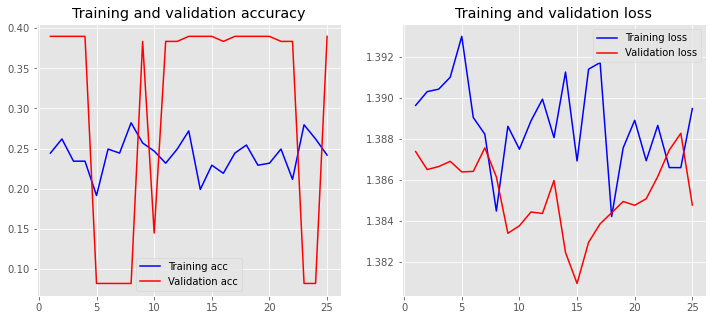

In [64]:
plot_history(history)

/opt/anaconda3/envs/machinelearning/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[1]


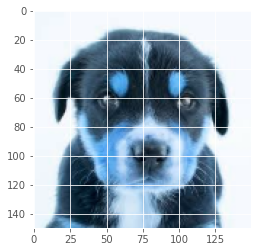

In [68]:

#model = Sequential()

#model =load_model('first_try.h5')
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

img = cv2.imread('data/test/dog.jpeg')
img = cv2.resize(img,(150,150))
img2 = np.reshape(img,[1,150,150,3])
classes = model.predict_classes(img2)
print(classes)
plt.imshow(img)

/opt/anaconda3/envs/machinelearning/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[1]


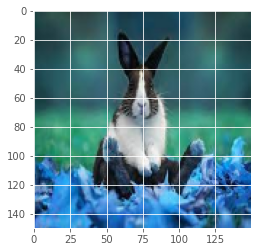

In [67]:
model.compile(loss='catigorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

img = cv2.imread('data/test/rabbit.jpeg')
img = cv2.resize(img,(150,150))
img2 = np.reshape(img,[1,150,150,3])
classes = model.predict_classes(img2)
print(classes)
plt.imshow(img)

/opt/anaconda3/envs/machinelearning/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


[1]


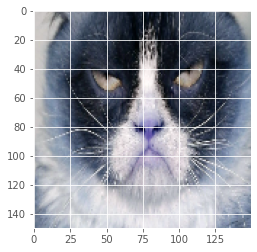

In [69]:
model.compile(loss='catigorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

img = cv2.imread('data/test/cat1.jpeg')
img = cv2.resize(img,(150,150))
img2 = np.reshape(img,[1,150,150,3])
classes = model.predict_classes(img2)
print(classes)
plt.imshow(img)

### Grid Search

In [79]:
def create_model(num_filters,num_filters1, kernel_size, dropout, optimizer):
    model = Sequential()
    model.add(Conv2D(num_filters, kernel_size, input_shape=(150, 150, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(num_filters1, kernel_size))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(num_filters1, kernel_size))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten()) # this converts our 3D feature maps to 1D feature vectors
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(dropout))
    model.add(Dense(4))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
    metrics=['accuracy'])
    return model

In [80]:
param_grid = dict(num_filters=[16,32,64],
                  num_filters1= [64], 
                  kernel_size=[(3, 3)],
                  dropout = [0.3, 0.5],
                  optimizer =['RMSprop','Adam']
                 )

In [81]:

X_train, y_train = next(iter(train_generator))
X_test, y_test = next(iter(validation_generator))

In [82]:
print(X_test.shape)

(16, 150, 150, 3)


In [83]:
epochs = 25

model = KerasClassifier(build_fn=create_model,
                            epochs=epochs, batch_size=100,
                            verbose=False)
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                          cv=4, verbose=1, n_iter=5)
grid_result = grid.fit(X_train, y_train)

# Evaluate testing set
test_accuracy = grid.score(X_test, y_test)
print('accuracy_test = ',test_accuracy)

print('best socre = ', grid_result.best_score_)
print('best param = ',grid_result.best_params_)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  3.1min finished


accuracy_test =  0.625
best socre =  0.5
best param =  {'optimizer': 'Adam', 'num_filters1': 64, 'num_filters': 64, 'kernel_size': (3, 3), 'dropout': 0.3}


In [84]:
model1 = create_model(optimizer= 'Adam', num_filters1= 64, num_filters= 64, kernel_size = (3, 3), dropout = 0.3)

In [85]:
history = model1.fit_generator(
        train_generator,
        epochs=8,
        validation_data=validation_generator,
    ) 

/opt/anaconda3/envs/machinelearning/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/8
25/25 [==============================] - 18s 696ms/step - loss: 1.4254 - accuracy: 0.2366 - val_loss: 1.3904 - val_accuracy: 0.2075
Epoch 2/8
25/25 [==============================] - 17s 686ms/step - loss: 1.3539 - accuracy: 0.3503 - val_loss: 1.3933 - val_accuracy: 0.3145
Epoch 3/8
25/25 [==============================] - 19s 744ms/step - loss: 1.2518 - accuracy: 0.4206 - val_loss: 1.1566 - val_accuracy: 0.4654
Epoch 4/8
25/25 [==============================] - 19s 744ms/step - loss: 0.9622 - accuracy: 0.5693 - val_loss: 1.2775 - val_accuracy: 0.4969
Epoch 5/8
25/25 [==============================] - 19s 762ms/step - loss: 0.9385 - accuracy: 0.6072 - val_loss: 0.7581 - val_accuracy: 0.7358
Epoch 6/8
25/25 [==============================] - 20s 785ms/step - loss: 0.7867 - accuracy: 0.6856 - val_loss: 1.0458 - val_accuracy: 0.5723
Epoch 7/8
25/25 [==============================] - 20s 780ms/step - loss: 0.7256 - accuracy: 0.7169 - val_loss: 0.8617 - val_accuracy: 0.6604
Epoch 

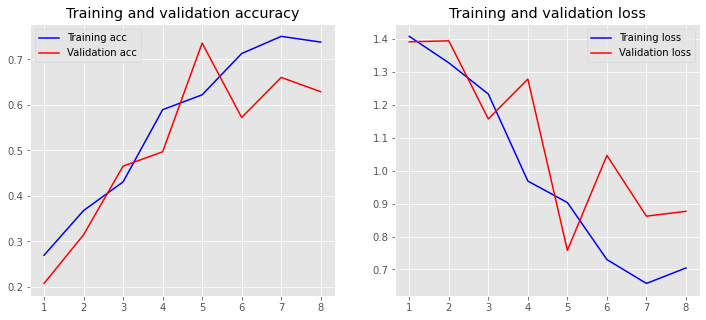

In [86]:
plot_history(history)

In [87]:
filenames = validation_generator.filenames
nb_samples = len(filenames)
nb_samples

159

In [89]:


#Confution Matrix and Classification Report
Y_pred = model1.predict_generator(validation_generator, nb_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['cat', 'dog', 'rabbit', 'eagles']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[19 28  9  5]
 [20 31  8  3]
 [ 2 14  6  1]
 [ 1  7  4  1]]
Classification Report
              precision    recall  f1-score   support

         cat       0.45      0.31      0.37        61
         dog       0.39      0.50      0.44        62
      rabbit       0.22      0.26      0.24        23
      eagles       0.10      0.08      0.09        13

    accuracy                           0.36       159
   macro avg       0.29      0.29      0.28       159
weighted avg       0.36      0.36      0.35       159



In [90]:
print(validation_generator.class_indices)
labels = {v : k for k , v in train_generator.class_indices.items()}
print(labels)

{'cats': 0, 'dogs': 1, 'rabbits': 2, 'eagles': 3}
{0: 'cats', 1: 'dogs', 2: 'rabbits', 3: 'eagles'}


In [121]:
img = cv2.imread('data/test/nounou2.jpg')
img = cv2.resize(img,(150,150))
img = np.reshape(img,[1,150,150,3])
classes = model1.predict_classes(img)
print(classes)

[2]


/opt/anaconda3/envs/machinelearning/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [124]:
def predict_label(img, model):
    img = cv2.imread(img)
    img = cv2.resize(img,(150,150))
    img = np.reshape(img,[1,150,150,3])
    classes = model1.predict_classes(img)
    
    return labels[classes[0]]

['cat.jpeg', 'cat1.jpeg', 'nounou1.jpeg', 'dog000539a.jpeg', 'dog000541a.jpeg', 'rabbit2.jpeg', 'dog1.jpeg', 'cat893a.jpeg', 'dog000540a.jpeg', 'cat886c.jpeg', 'dog.jpeg', 'nounou4.jpeg', 'rabbit.jpeg', 'rabbit1.jpeg', 'cat2.jpeg', 'nounou2.jpeg', 'nounou3.jpeg']


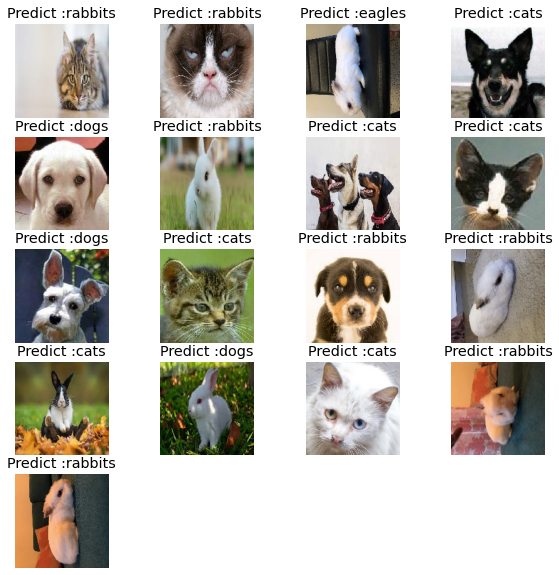

In [135]:
import matplotlib.pyplot as plt
import os

# Get list of animal in the folder

current_path = "data/test/"
list_animal=[] 
for file in os.listdir(current_path):
    list_animal.append(file)
print (list_animal)


plt.figure(figsize=(10, 10))
for i, image in enumerate(list_animal):
    ax = plt.subplot(5, 4, i +1)
    path = "data/test/" + image
    
    y_pred = predict_label(path, model)   
    img1 = load_img(path, target_size=(150, 150))
    plt.imshow(img1)
    label = "Predict :" + y_pred
    plt.title(label)
    plt.axis("off")

### RandomizedSearchCV

In [136]:
batch_size = 16


datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
rescale=1./255,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

In [137]:
# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

In [140]:
train_generator = train_datagen.flow_from_directory(
'data/train', # this is the target directory
classes = ["cats","dogs","rabbits", 'eagles'],
target_size=(150, 150), # all images will be resized to 150x150
batch_size=batch_size)
#,class_mode='binary')

Found 397 images belonging to 4 classes.


In [141]:
print(train_generator.samples)
print(validation_generator.samples)

397
159


In [145]:
# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
'data/validation',
classes = ["cats","dogs","rabbits", "eagles"],
target_size=(150, 150),
batch_size=batch_size)

Found 159 images belonging to 4 classes.


In [146]:
X_train, y_train = train_generator.next()

In [147]:
X_train.shape

(16, 150, 150, 3)

In [152]:
def create_model(num_filters,num_filters1, kernel_size, dropout, optimizer):
    model = Sequential()
    model.add(Conv2D(num_filters, kernel_size, input_shape=(150, 150, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(num_filters1, kernel_size))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(num_filters1, kernel_size))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten()) # this converts our 3D feature maps to 1D feature vectors
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(dropout))
    model.add(Dense(4))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
    metrics=['accuracy'])
    return model

In [153]:
param_grid = dict(num_filters=[16,32,64],
                  num_filters1= [64], 
                  kernel_size=[(3, 3)],
                  dropout = [0.3, 0.5],
                  optimizer =['RMSprop','Adam']
                  
                 )

In [154]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
epochs = 25

model = KerasClassifier(build_fn=create_model,
                            epochs=epochs, batch_size=16,
                            verbose=False)
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                          cv=4, verbose=1, n_iter=5)
grid_result = grid.fit(X_train, y_train)

# Evaluate testing set
test_accuracy = grid.score(X_test,y_test)
print('accuracy_test = ',test_accuracy)

print('best socre = ', grid_result.best_score_)
print('best param = ',grid_result.best_params_)



Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  3.9min finished


accuracy_test =  0.1875
best socre =  0.5
best param =  {'optimizer': 'RMSprop', 'num_filters1': 64, 'num_filters': 64, 'kernel_size': (3, 3), 'dropout': 0.3}


In [155]:
model1 = create_model(optimizer= 'RMSprop', num_filters1= 64, num_filters= 64, kernel_size = (3, 3), dropout = 0.3)

In [156]:
#clear_session()
history = model1.fit_generator(
train_generator,
steps_per_epoch= train_generator.samples// batch_size,
epochs=20,
validation_data=validation_generator,
#validation_steps= 2 
) # // batch_size)
#model.save_weights('drive/MyDrive/sample_data/first_try.h5') # always save your weights after training or during training

/opt/anaconda3/envs/machinelearning/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
24/24 [==============================] - 19s 751ms/step - loss: 1.9854 - accuracy: 0.2417 - val_loss: 1.3714 - val_accuracy: 0.4088
Epoch 2/20
24/24 [==============================] - 20s 791ms/step - loss: 1.4004 - accuracy: 0.3291 - val_loss: 1.3445 - val_accuracy: 0.3836
Epoch 3/20
24/24 [==============================] - 19s 805ms/step - loss: 1.2550 - accuracy: 0.4519 - val_loss: 1.4918 - val_accuracy: 0.2956
Epoch 4/20
24/24 [==============================] - 20s 813ms/step - loss: 1.0486 - accuracy: 0.5645 - val_loss: 0.8583 - val_accuracy: 0.6478
Epoch 5/20
24/24 [==============================] - 23s 935ms/step - loss: 0.8841 - accuracy: 0.6771 - val_loss: 0.7187 - val_accuracy: 0.7170
Epoch 6/20
24/24 [==============================] - 20s 851ms/step - loss: 0.6793 - accuracy: 0.6863 - val_loss: 0.9190 - val_accuracy: 0.5912
Epoch 7/20
24/24 [==============================] - 20s 810ms/step - loss: 0.6543 - accuracy: 0.7240 - val_loss: 0.7074 - val_accuracy: 0.7296

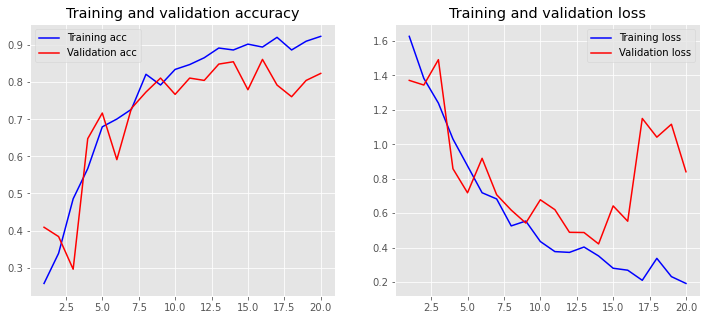

In [157]:
plot_history(history)

In [159]:
#Confution Matrix and Classification Report
Y_pred = model1.predict_generator(validation_generator, nb_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['cat', 'dog', 'rabbit', 'eagle']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[32 13 11  5]
 [30 17 10  5]
 [12  7  4  0]
 [ 8  2  1  2]]
Classification Report
              precision    recall  f1-score   support

         cat       0.39      0.52      0.45        61
         dog       0.44      0.27      0.34        62
      rabbit       0.15      0.17      0.16        23
       eagle       0.17      0.15      0.16        13

    accuracy                           0.35       159
   macro avg       0.29      0.28      0.28       159
weighted avg       0.36      0.35      0.34       159



In [161]:
model1.save_weights('third_try.h5')

In [164]:
modelWeight = model1.load_weights("third_try.h5")
config = model1.get_config()

In [165]:
model1.get_weights()

[array([[[[-0.10465885,  0.09976031, -0.08057377, ...,  0.07296275,
           -0.06720916,  0.02546653],
          [-0.02180401,  0.08054029,  0.01379147, ..., -0.0267267 ,
            0.07107271, -0.05431156],
          [-0.02869159,  0.08803305, -0.01046401, ..., -0.09064232,
           -0.05320369, -0.00849172]],
 
         [[ 0.01922577,  0.05709004, -0.06234127, ..., -0.08675123,
           -0.06055268, -0.04127911],
          [ 0.08750264, -0.00871935, -0.09928709, ..., -0.00272415,
           -0.08379319, -0.05174209],
          [-0.02693489,  0.03330179, -0.05989722, ..., -0.03770008,
            0.02894355, -0.06162708]],
 
         [[ 0.02053946,  0.05847   , -0.0776452 , ..., -0.06892983,
           -0.00593001, -0.03193663],
          [ 0.06732645,  0.07912825,  0.05546063, ...,  0.00776863,
           -0.06165863, -0.03880206],
          [-0.0145694 , -0.03914358,  0.00154609, ..., -0.04036928,
            0.00980355,  0.04183324]]],
 
 
        [[[ 0.02989337, -0.0868907

In [171]:
loss, acc = model1.evaluate(X_test, y_test, verbose=1)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

1/1 [==============================] - 0s 340ms/step - loss: 3.2065 - accuracy: 0.4375
Restored model, accuracy: 43.75%


In [173]:
predict_label("data/test/nounou2.jpeg", model3)

/opt/anaconda3/envs/machinelearning/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


'cats'